<table>
  <tr>
    <td style="text-align: center;"><h1>AI PROJECT (Personal Finance Manager)</h1></td>
  </tr>
</table>

# Group Members:
 ### 1. Najam Ul Islam Saeed 22l-7497
 ### 2. Umair Imran 22l-8370
 ### 3. Muhammad Fahad Hussain 22l-7463

##**Description:**
###"The datasets in the project cover personal finance data, including transactions, budget, investments, and monthly summaries. The features within each dataset provide details like dates, descriptions, amounts, types, categories, and account names. Data types vary, including numerical, categorical, and text. "

# -------------------------------------------------------------------------------------------------------------------------------------------

# Importing Libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Importing Datasets

### From Kaggle

In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bukolafatunde/personal-finance")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/personal-finance


In [23]:
## NOTE: Run the above 2 times to get the correct path
path1="/kaggle/input/personal-finance/personal_transactions.csv"
path2="/kaggle/input/personal-finance/Budget.csv"

In [79]:
df=pd.read_csv(path1)
df.head()

,Date,Description,Amount,Transaction Type,Category,Account Name
0,01/01/2018,Amazon,11.11,debit,Shopping,Platinum Card
1,01/02/2018,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,01/02/2018,Thai Restaurant,24.22,debit,Restaurants,Silver Card
3,01/03/2018,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card
4,01/04/2018,Netflix,11.76,debit,Movies & DVDs,Platinum Card


In [80]:
df.columns = ['Date', 'Description', 'Amount', "Transaction_Type","Category","Account_Name"]

In [81]:
df.columns

Index(['Date', 'Description', 'Amount', 'Transaction_Type', 'Category',
       'Account_Name'],
      dtype='object')

In [82]:
df1=pd.read_csv(path2)
df1.head()

,Category,Budget
0,Alcohol & Bars,50
1,Auto Insurance,75
2,Coffee Shops,15
3,Electronics & Software,0
4,Entertainment,25


### From Local Files

In [83]:
df2=pd.read_csv("investment_portfolio.csv")
df2.head()

,UserID,Investment_Type,Investment_Name,Amount_Invested,Current_Value,Date_of_Investment,Return(%)
0,U004,Mutual Fund,Bitcoin,1438.46,-410.29,10/10/2022,-128.52
1,U002,Crypto,Tesla,1290.37,1158.88,10/07/2017,-10.19
2,U009,Mutual Fund,Apple,1841.45,3793.80,24/08/2019,106.02
3,U004,Stock,Apple,4431.06,412.43,14/07/2017,-90.69
4,U007,Mutual Fund,Bitcoin,736.34,4374.91,23/01/2020,494.14


In [84]:
df3=pd.read_csv("monthly_summary.csv")
df3.head()

,Month,Income,Expenses,Savings,UserID
0,2018-01,5130.58,3105.10,2025.48,U001
1,2018-02,4273.93,4133.61,140.32,U001
2,2018-03,6334.46,3491.03,2843.43,U001
3,2018-04,4867.93,1892.28,2975.65,U001
4,2018-05,4826.25,3735.40,1090.85,U001


# Data Preprocessing

## Checking missing values

In [85]:
df.isnull().sum()

,0
Date,0
Description,0
Amount,0
Transaction_Type,0
Category,0
Account_Name,0


In [86]:
df1.isnull().sum()

,0
Category,0
Budget,0


In [87]:
df2.isnull().sum()

,0
UserID,0
Investment_Type,0
Investment_Name,0
Amount_Invested,0
Current_Value,0
Date_of_Investment,0
Return(%),0


In [88]:
df3.isnull().sum()

,0
Month,0
Income,0
Expenses,0
Savings,0
UserID,0


## Checking and Removing Outliers

In [75]:
#df.dtypes
#df1.dtypes
#df2.dtypes     #uncomment as required
#df3.dtypes


In [89]:
fig = px.box(df, y="Amount", title="Outliers in 'Amount' (df)")
fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels by -45 degrees
fig.show()

fig1 = px.box(df1, y="Budget", title="Outliers in 'Budget' (df1)")
fig1.update_layout(xaxis_tickangle=-45)
fig1.show()

fig2 = px.box(df2, y="Amount_Invested", title="Outliers in 'Amount_Invested' (df2)")
fig2.update_layout(xaxis_tickangle=-45)
fig2.show()

fig2a = px.box(df2, y="Current_Value", title="Outliers in 'Current_Value' (df2)")
fig2a.update_layout(xaxis_tickangle=-45)
fig2a.show()

fig2b = px.box(df2, y="Return(%)", title="Outliers in 'Return(%)' (df2)")
fig2b.update_layout(xaxis_tickangle=-45)
fig2b.show()

fig3 = px.box(df3, y="Income", title="Outliers in 'Income' (df3)")
fig3.update_layout(xaxis_tickangle=-45)
fig3.show()

fig3a = px.box(df3, y="Expenses", title="Outliers in 'Expenses' (df3)")
fig3a.update_layout(xaxis_tickangle=-45)
fig3a.show()

fig3b = px.box(df3, y="Savings", title="Outliers in 'Savings' (df3)")
fig3b.update_layout(xaxis_tickangle=-45)
fig3b.show()

In [90]:
def replace_outliers_with_mean(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    column_mean = df[column].mean()

    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = int(column_mean)

    return df

In [91]:
df = replace_outliers_with_mean(df, 'Amount')
df1 = replace_outliers_with_mean(df1, 'Budget')
df2 = replace_outliers_with_mean(df2, 'Amount_Invested')
df2 = replace_outliers_with_mean(df2, 'Current_Value')
df2 = replace_outliers_with_mean(df2, 'Return(%)')
df3 = replace_outliers_with_mean(df3, 'Income')
df3 = replace_outliers_with_mean(df3, 'Expenses')
df3 = replace_outliers_with_mean(df3, 'Savings')

## Checking Dimensionality

In [92]:
df.shape

(806, 6)

In [93]:
df1.shape

(19, 2)

In [94]:
df2.shape

(1200, 7)

In [95]:
df3.shape

(1260, 5)

## Checking statistics

In [96]:
df.describe()

,Amount
count,806.000000
mean,90.024715
std,101.208612
min,1.750000
25%,15.687500
50%,37.480000
75%,117.680000
max,273.000000


In [97]:
df1.describe()

,Budget
count,19.000000
mean,72.315789
std,67.366372
min,0.000000
25%,15.000000
50%,65.000000
75%,111.500000
max,250.000000


In [98]:
df2.describe()

,Amount_Invested,Current_Value,Return(%)
count,1200.000000,1200.000000,1200.000000
mean,1999.567325,2087.063250,12.360258
std,965.885119,1134.083361,70.728045
min,-639.120000,-980.440000,-159.460000
25%,1360.265000,1325.345000,-36.732500
50%,1962.585000,2096.015000,4.170000
75%,2678.305000,2835.835000,60.000000
max,4603.640000,5026.530000,221.880000


In [99]:
df3.describe()

,Income,Expenses,Savings
count,1260.000000,1260.000000,1260.000000
mean,5050.989286,3502.881190,1596.857738
std,703.551898,439.474134,826.942659
min,3310.440000,2525.040000,-353.370000
25%,4597.485000,3142.820000,1081.322500
50%,5083.020000,3493.980000,1638.655000
75%,5537.647500,3781.732500,2154.517500
max,6718.190000,4562.300000,2975.650000


# Data Visualization

### Numerical

In [101]:
fig = px.histogram(df, x="Amount", title="Distribution of Amount")
fig.show()

fig = px.box(df, y="Amount", title="Box Plot of Amount")
fig.show()


In [102]:
fig1a= px.histogram(df1, x="Budget", title="Distribution of Budget")
fig1a.show()

fig1 = px.box(df1, y="Budget", title="Outliers in 'Budget' (df1)")
fig1.update_layout(xaxis_tickangle=-45)
fig1.show()

In [103]:
fig21= px.histogram(df2, x="Amount_Invested", title="Distribution of Amount_Invested")
fig21.show()

fig2 = px.box(df2, y="Amount_Invested", title="Outliers in 'Amount_Invested' (df2)")
fig2.update_layout(xaxis_tickangle=-45)
fig2.show()

In [104]:
fig22= px.histogram(df2, x="Current_Value", title="Distribution of Current_Value")
fig22.show()

fig2a = px.box(df2, y="Current_Value", title="Outliers in 'Current_Value' (df2)")
fig2a.update_layout(xaxis_tickangle=-45)
fig2a.show()


In [105]:
fig23= px.histogram(df2, x="Return(%)", title="Distribution of Return(%)")
fig23.show()

fig2b = px.box(df2, y="Return(%)", title="Outliers in 'Return(%)' (df2)")
fig2b.update_layout(xaxis_tickangle=-45)
fig2b.show()

In [106]:
fig31= px.histogram(df3, x="Income", title="Distribution of Income")
fig31.show()

fig3 = px.box(df3, y="Income", title="Outliers in 'Income' (df3)")
fig3.update_layout(xaxis_tickangle=-45)
fig3.show()


In [107]:
fig32= px.histogram(df3, x="Expenses", title="Distribution of Expenses")
fig32.show()

fig3a = px.box(df3, y="Expenses", title="Outliers in 'Expenses' (df3)")
fig3a.update_layout(xaxis_tickangle=-45)
fig3a.show()

In [108]:
fig33= px.histogram(df3, x="Savings", title="Distribution of Savings")
fig33.show()

fig3b = px.box(df3, y="Savings", title="Outliers in 'Savings' (df3)")
fig3b.update_layout(xaxis_tickangle=-45)
fig3b.show()

### Categorical

In [109]:
fig_category = px.bar(df, x='Category', title='Distribution of Categories')
fig_category.show()

fig_transaction_type = px.pie(df, names='Transaction_Type', title='Distribution of Transaction Types')
fig_transaction_type.show()

fig_account_name = px.bar(df, x='Account_Name', title='Distribution of Account Names')
fig_account_name.show()


### Scatter plot

In [110]:
fig_scatter = px.scatter(df, x='Date', y='Amount', title='Scatter Plot: Amount vs. Date')
fig_scatter.show()


### Pair Plot

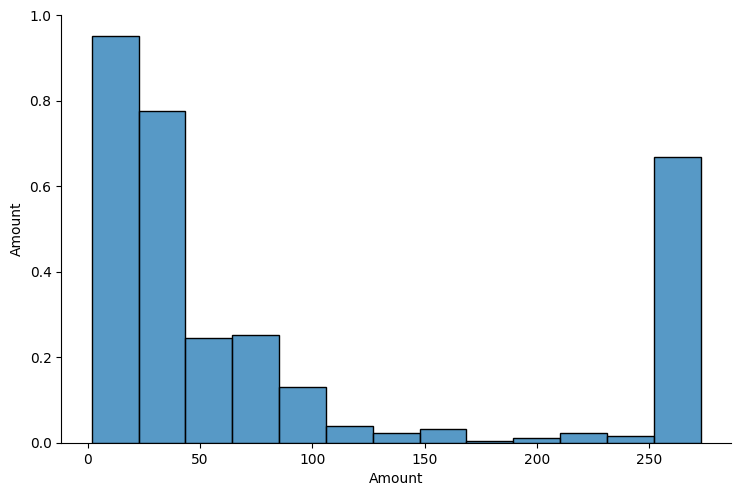

In [112]:
sns.pairplot(df[['Amount']], height=5, aspect=1.5)
plt.show()

# Future Methodologies

1. Integrate datasets for comprehensive analysis.
2. Engineer new features (time-based, totals, categories).
3. Transform data (scaling, encoding).
4. Explore patterns through visualization and statistics (EDA).
5. Forecast using regression (expenses, income, savings).
6. Model: Linear Regression, Decision Tree, Random Forest.
7. Evaluate: MSE, R-squared.